In [1]:
import numpy as np
import scipy.constants as const 
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
plt.style.use('../presentation.mplstyle')


/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "../presentation.mplstyle", line #10
  (fname, cnt))
/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "../presentation.mplstyle", line #11
  (fname, cnt))
/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def catenaria(x,T_0):
    '''
    Devuelve la catenaria
    '''
    
    
    p_m = 0.1888 # kg/m
    
    lam = T_0/p_m
    y = lam * np.cosh(x/lam) 
    
    return y

H = 10.0
T_0 = 407.25 # kg
catenaria(20,T_0)-catenaria(0,T_0)

0.092720124042898533

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


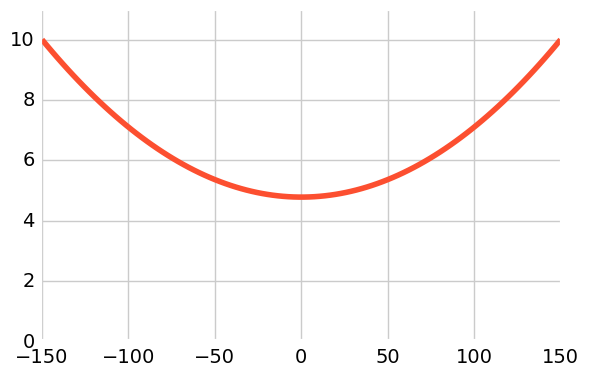

In [3]:
fig, (ax0) = plt.subplots(nrows=1)   # creates a figure with one axe
H = 10.0
vano = 150.0
T_0 = 407.25 # kg

x = np.linspace(-vano,vano,100)

y = catenaria(x,T_0) 

ax0.plot(x,y-y[0]+ H) 
ax0.set_xlim((-vano-1,vano+1))
ax0.set_ylim((0,H+1))
fig.show()

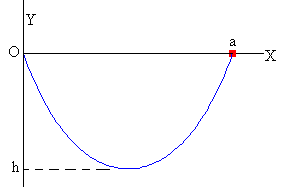

In [4]:

Image("catenaria3.png")

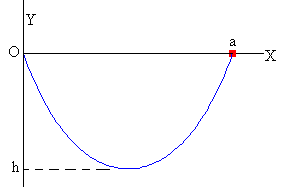

In [5]:
Image("catenaria3.png")

### Interactivo

esta prueba

In [6]:
from ipywidgets import widgets

In [7]:
from ipywidgets import interact
import numpy as np
from bokeh.layouts import column, row,widgetbox
from bokeh.models import Label
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import TextInput

output_notebook()


Loading BokehJS ...

In [8]:
def catenaria(vano,T_0,H):
    '''
    Devuelve la catenaria
    '''
    
    x = np.linspace(-vano/2,vano/2,100)
        
    lam = T_0/p_m
    y = lam * np.cosh(x/lam) 
    y = y - y[0] + H
    
    T = T_0*np.cosh(x/lam) 
    return x,y,T

H = 10.0
vano = 150.0
T_0 = 407.25 # kg

p = 107.0 # kg/km
T_0 = 990.0/4*10  # N

p_m =  p/1000*9.81 # N/m



x,y,T = catenaria(vano,T_0,H)

pcatenary = figure(title="Catenary", plot_height=300, plot_width=600, y_range=(0,H+2))
pforce  = figure(title="Force", plot_height=300, plot_width=600, y_range=(0,1000))

rcatenary = pcatenary.line(x, y, color="#2222aa", line_width=3)
rforce    = pforce.line(x,T, color="#aa2222", line_width=3)

mytext = Label(x=70, y=70, text='here your text')

text_min_height = TextInput(value='{:2.2f}'.format(np.min(y)), title="Minimum height:")
text_max_force  = TextInput(value='{:2.2f}'.format(np.max(T)), title="Maximum force:")


In [9]:
def update(T_0 = 400, vano=150):

    x,y,T = catenaria(vano,T_0,H)
    rcatenary.data_source.data['x'] = x
    rcatenary.data_source.data['y'] = y
    rforce.data_source.data['x'] = x
    rforce.data_source.data['y'] = T
    text_min_height.value = '{:2.2f}'.format(np.min(y))
    text_max_force.value  = '{:2.2f}'.format(np.max(T))
    push_notebook()

In [10]:
show(column(row(pcatenary,widgetbox(text_min_height,text_max_force)),pforce), notebook_handle=True)

In [11]:
interact(update, vano=(10,300), T_0=(200,1000))

<function __main__.update>

$$ l_{I} = a \left( 1 + \frac{a^2p_{I}^2}{24 T_{X_{I}}^2}  \right)$$

$$ l_{II} = a \left( 1 + \frac{a^2p_{II}^2}{24 T_{X_{II}}^2}  \right)$$

$$ \Delta l = \Delta l_n + \Delta l_\theta = l_{II} - l_{I} $$  

$$ \Delta l_n = \frac{T_{II} - T_{I}}{S E} $$

$$ \Delta l_\theta = l_I \alpha \left( \theta_{II} - \theta_{I} \right) $$

In [12]:
import scipy.optimize

E = 7900.0*10 # daN/mm2
alpha = 19.1e-6 # 1/C
p = 107.0 # kg/km
s_total = 31.1 # mm2
a = 50.0 # m

T_I = 990.0/4*10  # N
T_I = 925.0
p_I =  p/1000*9.81 # N/m
p_II = p/1000*9.81 # N/m

S = s_total 

theta_I  = 40.0
theta_II = 50.0

def f(x):
    
    T_II = x
    
    T_XI  = T_I
    T_XII = T_II
    
    
    
    l_I =  a * ( 1 + (a**2 * p_I **2)/(24 * T_XI**2))
    l_II = a * ( 1 + (a**2 * p_II**2)/(24 * T_XII**2))
    
    Dl_n = (T_II - T_I)/(S*E)
    Dl_theta = l_I*alpha*(theta_II - theta_I)
    
    Eq = Dl_n + Dl_theta - (l_II - l_I) 
    
    return Eq
                
T_II = scipy.optimize.broyden2(f, [T_I], f_tol=1e-14)

T_XI  = T_I

lam = T_I/p_I

l_I =  a * ( 1 + (a**2 * p_I**2)/(24 * T_XI**2))
l_I_2 =  2 * lam * np.sinh(a/(2*lam))

print('l_I  = {:2.5f}'.format(l_I)) 
print('l_I_2 = {:2.5f}'.format(l_I_2))

print('T_I  = {:2.3f}'.format(T_I)) 
print('T_II = {:2.3f}'.format(T_II[0]))

print('lam = {:2.3f}'.format(T_I/p_I))

l_I*alpha*(theta_II - theta_I)

l_I  = 50.00671
l_I_2 = 50.00671
T_I  = 925.000
T_II = -39010.424
lam = 881.229


0.009551281015082786

In [13]:
T481300 LA-30
 26,7
 31,1
 17
 2,38
 7,14
 6 2,38 1 2,38 990
 1,0749
 107,9
 7900
 19,1
T481400 LA-56
 46,8
 54,6
 30
 3,15
 9,45
 6 3,15 1 3,15 1640
 0,6136
 189,1
 7900
 19,1
T481500 LA-78
 67,4
 78,6
 42
 3,78
 11,34
 6 3,78 1 3,78 2310
 0,4261
 272,1
 7900
 19,1
T481700 LA-110
 94,2
 116,2
 60
 6,00
 14,00
 30 2,00 7 2,00 4310
 0,3066
 433
 8000
 17,8
T481800 LA-145
 119,3
 147,1
 75
 6,75
 15,75
 30 2,25 7 2,25 5410
 0,2422
 548
 8000
 17,8
T481900 LA-180
 147,3
 181,6
 93
 7,50
 17,50
 30 2,50 7 2,50 6390
 0,1962
 676
 8000
 17,8
T482100 LA-280
 241,7
 281,1
 152
 8,04
 21,80
 26 3,44 7 2,68 8450
 0,1194
 977
 7500
 18,9


SyntaxError: invalid syntax (<ipython-input-13-1e67a75a1b3e>, line 1)

In [84]:
import scipy.optimize

E = 8200.0
alpha = 17.8e-6 # 1/C
p = 0.548 # kg/m
s_total = 147.1 # mm2
a = 275.0 # m

s = s_total 

q_1  = -15
q_2 = -15

t_1 = 9.38

m_1 = 2.3
m_2 = 2.3
P_0 = p/S


def f(x):
    
    T_I = t_1*s
    t_2 = x
  
    T_2 = s*t_2
    
    T_II = T_2
    
    T_XI  = T_I
    T_XII = T_II
    
    p_I = m_1*p
    p_II = m_2*p
    
    theta_II = q_2
    theta_I = q_1
    
    l_I =  a * ( 1 + (a**2 * p_I **2)/(24 * T_XI**2))
    l_II = a * ( 1 + (a**2 * p_II**2)/(24 * T_XII**2))
    
    Dl_n = (T_II - T_I)/(s*E)
    Dl_theta = l_I*alpha*(theta_II - theta_I)
    
    Eq = Dl_n + Dl_theta - (l_II - l_I)     
    return Eq
                
t_2= scipy.optimize.broyden2(f, [t_1], f_tol=1e-10)

print(t_1)

print(t_2)

T_2 = t_2*s
P_2 = m_2*p

flecha_2 = P_2*a**2/(8*T_2)

print(flecha_2)

9.38
[ 9.38]
[ 8.63511815]


In [34]:
E = 8200.0
alpha = 17.8e-6 # 1/C
p = 0.548 # kg/m
s_total = 147.1 # mm2
a = 275.0 # m

s = s_total 

q_1  = -15
q_2 = 65

t_1 = 9.38

m_1 = 2.3
m_2 = 1
P_0 = p/S


def f(x):
    
    t_2 = x
  
    
    
    Eq = t_2**2*(t_2 + (m_1**2*P_0**2*a**2)/(24*t_1**2)*E + (q_2-q_1)*alpha*E-t_1 )-(m_2**2*P_0**2*a**2/24*E)
    
    return Eq
                
t_2= scipy.optimize.broyden2(f, [t_1], f_tol=1e-10)

print(t_1)

print(t_2)

T_2 = t_2*s
P_2 = m_2*p

flecha_2 = P_2*a**2/(8*T_2)

print(flecha_2)


2.988472028013965

In [46]:
np.sqrt(3)

1.7320508075688772